# Analysis of Allison Scanner Measurements: an Example

***

# Required Inputs

### 1) Allison scanner geometry 
### 2) Beam parameters
### 3) Measurement Data

## Input 1: Allison scanner geometry

#### Example: FRIB Design pre-2018

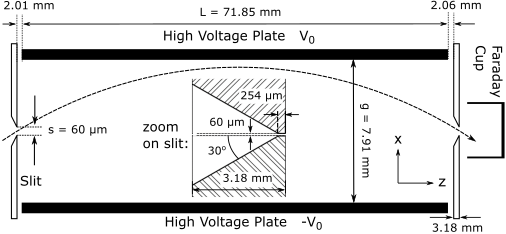

In [1]:
from IPython.display import Image
Image("geometry.png")

#### An Allison scanner can be modelled geometrically using 6 parameters. In the example above,

#### $L = 71.85$ mm
#### $g = 7.91$ mm
#### $l_1 = 2.01$ mm
#### $l_2 = 2.06 + 3.18 - 0.254 = 4.986$ mm
#### $s = 0.06$ mm
#### $d = 0.254$ mm

## Input 2: Beam Parameters
#### a) mass number 
#### b) charge state
#### c) kinetic energy of beam

## Input 3: Measurement Data

#### Three 2D arrays corresponding to the current measured at each (position, voltage) value of the scan:
#### a) X_grid     
#### b) V_grid
#### c) I_grid

#### The values in the 2D arrays have to be arranged such that they would correspond to an $m \times n$ grid with $m$ voltage steps and $n$ position steps  in the following way

\begin{equation}
\left[
  \begin{array}{cccc}
  \text{I_grid}[0,0] & \text{I_grid}[0,1] & \dots & \text{I_grid}[0,n] \\
  \text{I_grid}[1,0] & \text{I_grid}[1,1] & \dots & \text{I_grid}[1,n] \\
  \vdots & \vdots & \vdots & \vdots \\
  \text{I_grid}[m,0] & \text{I_grid}[m,1] & \dots & \text{I_grid}[m,n] \\
  \end{array}
\right]
\end{equation}

#### Note that in this format, V_grid[0,0] > V_grid[m,0]

### An example:

In [2]:
import numpy as np
X_grid, V_grid = np.meshgrid(np.linspace(-14,14,8),np.linspace(800,-800,11))

In [3]:
print(X_grid)

[[-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]]


In [4]:
print(V_grid)

[[ 800.  800.  800.  800.  800.  800.  800.  800.]
 [ 640.  640.  640.  640.  640.  640.  640.  640.]
 [ 480.  480.  480.  480.  480.  480.  480.  480.]
 [ 320.  320.  320.  320.  320.  320.  320.  320.]
 [ 160.  160.  160.  160.  160.  160.  160.  160.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [-160. -160. -160. -160. -160. -160. -160. -160.]
 [-320. -320. -320. -320. -320. -320. -320. -320.]
 [-480. -480. -480. -480. -480. -480. -480. -480.]
 [-640. -640. -640. -640. -640. -640. -640. -640.]
 [-800. -800. -800. -800. -800. -800. -800. -800.]]


#### Example phase space measurements for a beam with
#### $\left\langle x \right\rangle = 0~\text{mm}$ ;       $\left\langle x' \right\rangle = 0~\text{mrad}$
#### $\left\langle xx \right\rangle = 25~\text{mm}^2$ ;       $\left\langle xx' \right\rangle = 100~\text{mm mrad}$ ;       $\left\langle x'x' \right\rangle = 625~\text{mrad}^2$
#### $\varepsilon_x = 75~\text{mm mrad}$ ;      $\varepsilon_{x, \text{normalized}} = 0.38~\text{mm mrad}$

In [5]:
I_grid = np.array([[ 1.92839613e-06, -5.56186413e-05,  2.24001694e-04,
         1.14761275e-05, -7.35022170e-05,  9.41136509e-05,
        -1.87814176e-05,  7.63793393e-05],
       [-1.15981945e-04, -9.68553994e-06, -6.83374821e-05,
        -1.28982070e-04,  2.71506804e-04,  2.44351420e-04,
         2.18761932e-02, -2.50835317e-04],
       [-5.99321528e-05, -3.65178558e-05,  6.48466068e-05,
         2.09794531e-04,  1.56930909e-02,  1.05883018e-01,
         6.68966072e-02,  2.67083822e-05],
       [-9.12926979e-05, -1.25672138e-04, -1.27589337e-04,
         1.01169441e-03,  1.71443202e-01,  1.77979873e-01,
         5.72135771e-02, -9.37087371e-05],
       [-1.88670498e-04,  8.11177383e-05,  1.49089173e-04,
         1.74700297e-01,  2.73403641e-01,  1.79913207e-01,
         1.58154270e-04, -2.34417854e-05],
       [ 5.72028167e-05, -9.53534897e-05,  1.18334405e-01,
         3.09349466e-01,  2.97937743e-01,  1.09371266e-01,
        -1.32166102e-04,  7.92613633e-05],
       [ 9.79610286e-05,  6.26085763e-06,  1.91127073e-01,
         2.66525047e-01,  1.70542997e-01,  5.23361020e-05,
         7.38751517e-05,  1.03156752e-04],
       [ 7.31847398e-05,  6.31962716e-02,  1.85003554e-01,
         1.69825903e-01,  1.70258517e-03, -2.45694515e-05,
        -3.20186109e-05, -7.33472045e-06],
       [ 1.26607923e-04,  6.96851068e-02,  1.07965163e-01,
         1.85259677e-02,  4.84225896e-05, -1.31724377e-05,
        -1.45982134e-06, -7.28808681e-06],
       [ 1.71569409e-04,  2.64536231e-02, -1.83928138e-04,
        -4.18455768e-05, -5.68710088e-05,  1.89640847e-04,
         1.94861326e-05,  4.86787569e-05],
       [ 3.40601753e-05, -6.97183569e-06,  2.68499177e-05,
         4.22392248e-05, -1.40961300e-04,  9.99078918e-05,
         1.87740434e-04, -3.21179462e-05]])
np.set_printoptions(precision=1)
print(I_grid)

[[ 1.9e-06 -5.6e-05  2.2e-04  1.1e-05 -7.4e-05  9.4e-05 -1.9e-05  7.6e-05]
 [-1.2e-04 -9.7e-06 -6.8e-05 -1.3e-04  2.7e-04  2.4e-04  2.2e-02 -2.5e-04]
 [-6.0e-05 -3.7e-05  6.5e-05  2.1e-04  1.6e-02  1.1e-01  6.7e-02  2.7e-05]
 [-9.1e-05 -1.3e-04 -1.3e-04  1.0e-03  1.7e-01  1.8e-01  5.7e-02 -9.4e-05]
 [-1.9e-04  8.1e-05  1.5e-04  1.7e-01  2.7e-01  1.8e-01  1.6e-04 -2.3e-05]
 [ 5.7e-05 -9.5e-05  1.2e-01  3.1e-01  3.0e-01  1.1e-01 -1.3e-04  7.9e-05]
 [ 9.8e-05  6.3e-06  1.9e-01  2.7e-01  1.7e-01  5.2e-05  7.4e-05  1.0e-04]
 [ 7.3e-05  6.3e-02  1.9e-01  1.7e-01  1.7e-03 -2.5e-05 -3.2e-05 -7.3e-06]
 [ 1.3e-04  7.0e-02  1.1e-01  1.9e-02  4.8e-05 -1.3e-05 -1.5e-06 -7.3e-06]
 [ 1.7e-04  2.6e-02 -1.8e-04 -4.2e-05 -5.7e-05  1.9e-04  1.9e-05  4.9e-05]
 [ 3.4e-05 -7.0e-06  2.7e-05  4.2e-05 -1.4e-04  1.0e-04  1.9e-04 -3.2e-05]]


***

# Data Analysis

## Import Modules

In [6]:
from as_model import ASModel
from as_data import ASData

## Build Allison Scanner Model

#### Create an object of the Allison Scanner Model using: 1) geometric parameters, and 2) beam parameters

In [7]:
scanner = ASModel(L = 71.85,   # all geometric parameters are in units of mm
                  g = 7.91,
                  l1 = 2.01,
                  l2 = 4.986,
                  s = 0.06,
                  d = 0.254,
                  A_ion = 39.948,     # atomic number
                  Q_ion = 9,          # charge state
                  KE_per_u = 12e3)    # KE per amu

## Perform Analysis

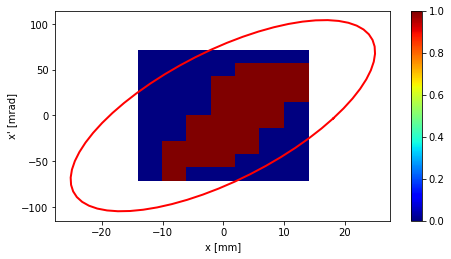

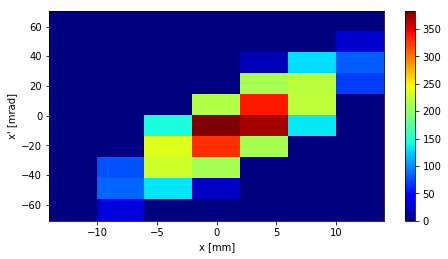

x_cen = -0.09729226389550638 mm
xp_cen = -0.26705173364582924 mrad
x_rms = 5.028941325805319 mm
xxp = 87.92183871346165 mm-mrad
xp_rms = 23.310798997266527 mrad
x_emit_normalized = 0.39357894051496306 mm-mrad
alpha = -1.1339039841219534 
beta = 0.3261614705446817 m
gamma = 7.00799589047263 1/m
total projected current = 4157.390588960876 A
Enter: 1 if ellipse area is okay, 2 if not1


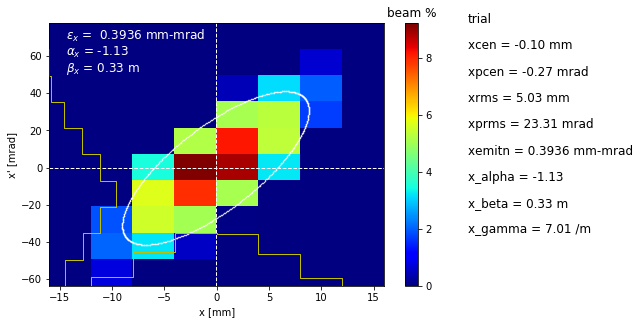

In [8]:
scan_analysis = ASData(scanner = scanner,      # Allison scanner model
                       I_grid = I_grid,        # 2D array for measured currents
                       X_grid = X_grid,        # 2D array for position values
                       V_grid = V_grid,        # 2D array for voltage values
                       name = 'Example',         # name of output figure
                       threshold_sigma = 2,    # threshold sigma in noise removal, typically 2 
                       correction = 'weight')  # correction scheme applied

#### Note: the user can change the size of the automatically generated ellipse determining the beam region if the ellipse is too small (truncates the phase space distribution) or too large (includes large areas with no beam)